In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("homeprices_banglore.csv")
df.sample(5) # Show samples

,area,bedrooms,price
14,2250,3,101.0
4,1200,2,51.0
5,1170,2,38.0
11,2785,4,140.0
15,1175,2,42.0


In [5]:
# I do scaling, because when I do scaling, my machine learning models performs really well

In [6]:
from sklearn import preprocessing

In [8]:
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price', axis='columns'))
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [16]:
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [19]:
scaled_X.T.shape

(2, 20)

In [22]:
a = np.array([1,2,3])
b = np.array([10, 5,7])
np.mean(np.square(a-b))

35.333333333333336

In [28]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    number_of_features = X.shape[1]
    
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        
        y_predicted = np.dot(w, scaled_X.T) + b
        
        #I don't know why -(2/total_samples) below...
        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        
        w = w- learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true - y_predicted))
        
        if i%10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],),500)
        

In [29]:
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

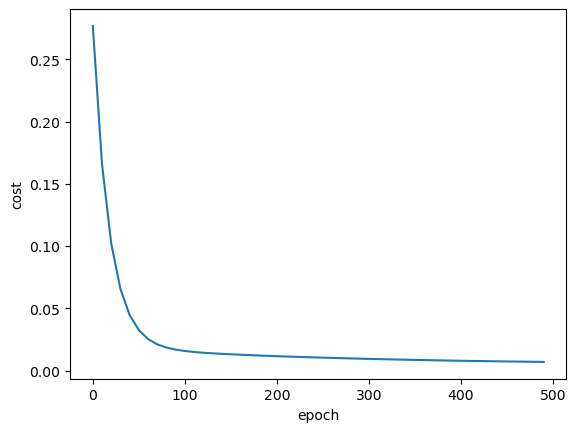

In [30]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list, cost_list)

In [31]:
sx.transform([[2600, 4]])

C:\Moje_programy\envs\ZMWD1\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


array([[0.62068966, 0.75      ]])

In [37]:
def predict(area, bedrooms, w ,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    return sy.inverse_transform([[scaled_price]])[0][0]
    

predict(2600, 4, w, b)

# def predict(area,bedrooms,w,b):
#     scaled_X = sx.transform([[area, bedrooms]])[0]
#     # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
#     # equation for price is w1*area + w2*bedrooms + w3*age + bias
#     # scaled_X[0] is area
#     # scaled_X[1] is bedrooms
#     # scaled_X[2] is age
#     scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
#     # once we get price prediction we need to to rescal it back to original value
#     # also since it returns 2D array, to get single value we need to do value[0][0]
#     return sy.inverse_transform([[scaled_price]])[0][0]

# predict(2600,4,w,b)

C:\Moje_programy\envs\ZMWD1\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


128.45484403267596

In [38]:
import random
random.randint(0,6)

5

In [49]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    number_of_features = X.shape[1]
    
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        random_index = random.randint(0,total_samples-1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        
        y_predicted = np.dot(w, sample_x.T) + b
        
        #I don't know why -(2/total_samples) below...
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*np.sum(sample_y-y_predicted)
        
        w = w- learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(sample_y - y_predicted))
        
        if i%100 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w, b, cost, cost_list, epoch_list

w_sdg, b_sdg, cost_sdg, cost_list_sdg, epoch_list_sdg = stochastic_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],),10000)
w_sdg, b_sdg, cost_sdg
        

(array([0.71067013, 0.67529327]), -0.23178446766462452, 0.02391441458677683)

In [41]:
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

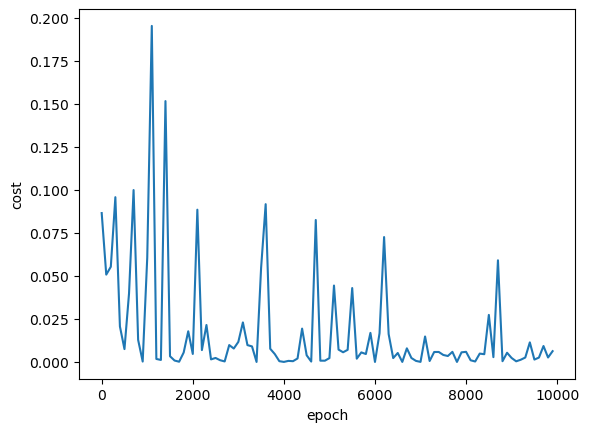

In [50]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sdg, cost_list_sdg)

In [51]:
predict(2600, 4, w_sgd, b_sgd)

C:\Moje_programy\envs\ZMWD1\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


129.22859116415097

In [52]:
predict(1500, 3, w_sgd, b_sgd)

C:\Moje_programy\envs\ZMWD1\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


70.00888927484698

# Mini batch gradient descent

In [53]:
import random
random.randint(0,6)

2

In [62]:
random_index = random.randint(0,14-1)
random_index

5

In [73]:
# Określ przedział liczb
start = 1
end = 10

# Wylosuj 10 liczb z przedziału
numbers = random.sample(range(start, end + 1), 10)

# Wyświetl wylosowane liczby
print(numbers)

type(numbers)

scaled_X[numbers]

[1, 6, 2, 8, 9, 3, 4, 7, 5, 10]


array([[0.62068966, 0.75      ],
       [0.6662069 , 0.75      ],
       [0.22068966, 0.5       ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.86206897, 0.75      ],
       [0.12758621, 0.25      ],
       [0.34482759, 0.5       ]])

In [66]:
type(scaled_X)

numpy.ndarray

In [74]:
def mini_batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    number_of_features = X.shape[1]
    
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    start = 1
    end = 10
    
    for i in range(epochs):
        
#         random_index = random.randint(0,total_samples-1)
#         sample_x = X[random_index]
#         sample_y = y_true[random_index]
        #
        # Określ przedział liczb
    

        # Wylosuj 10 liczb z przedziału
        random_index = random.sample(range(start, end + 1), 10)

        # Wyświetl wylosowane liczby
#         print(numbers)
        #
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
        
        #I don't know why -(2/total_samples) below...
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*np.sum(sample_y-y_predicted)
        
        w = w- learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(sample_y - y_predicted))
        
        if i%100 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w, b, cost, cost_list, epoch_list

w_mbgd, b_mbgd, cost_mbgd, cost_list_mbgd, epoch_list_mbgd = mini_batch_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],),120)
w_mbgd, b_mbgd, cost_mbgd


(array([0.82466859, 0.79360354]), -0.2929531967214668, 0.018676221689602722)

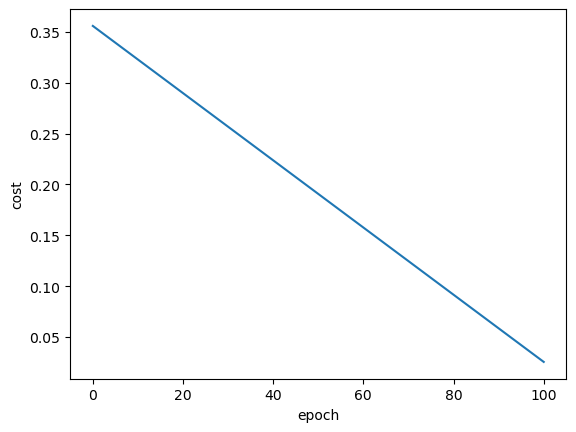

In [75]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_mbgd, cost_list_mbgd)

In [76]:
# I have different solution than here: https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/8_sgd_vs_gd/mini_batch_gd.ipynb

In [77]:
# Maybe I misunderstood something. I don't know really